# **DEEP LEARNING**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**DEEP LEARNING - REGRESIÓN LINEAL (Intro)**

Facultad de Ingeniería

# Librerías

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#from tensorflow.keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.regularizers import L1L2

# Dataset

Generar datos tipo Scatter utiliizando DrawData (generar en línea)

https://calmcode.io/labs/drawdata.html

In [2]:
!pip install drawdata

from drawdata import ScatterWidget

widget = ScatterWidget()
widget


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.6/237.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00


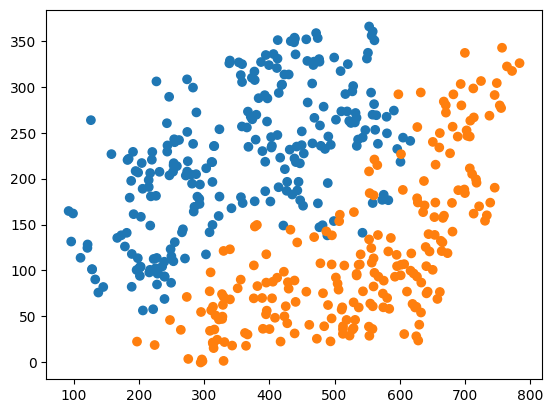

In [3]:
import matplotlib.pylab as plt

df = widget.data_as_pandas
plt.scatter(df['x'], df['y'], color=df['color'])

In [4]:
#data = pd.read_csv('data.csv')
data = df

# Dividir dataset y aleatorizar
x_train, x_test = train_test_split(data, test_size=0.1, random_state=42)

# DATOS DE ENTRENAMIENTO

# Extraer el label de los datos y convertir a dataframe
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("label")
color2n = x_train.pop("color")
lote = x_train.pop("batch")
print(type(y_train))  # pandas.Series

# Features
x_train = (x_train/1000).to_numpy().astype('float32')

# Labels
y_train = np.fromiter(map(ord, y_train), int, count=len(y_train))-97    #ASCII a: 97, b:98, c: 99, d:100
y_train = np.reshape(y_train, (len(y_train),1)).astype('float32')

print(x_train.shape)
print(y_train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(420, 2)
(420, 1)


In [5]:
# DATOS DE VALIDACIÓN

# Extraer el label de los datos y convertir a dataframe
y_test = x_test.pop("label")
color2n = x_test.pop("color")
lote = x_test.pop("batch")
# Features
x_test = (x_test/1000).to_numpy().astype('float32')

# Labels
y_test = np.fromiter(map(ord, y_test), int, count=len(y_test)) - 97
y_test = np.reshape(y_test, (len(y_test),1)).astype('float32')

print(x_test.shape)
print(y_test.shape)

(47, 2)
(47, 1)


# Graficar con Matplotlib

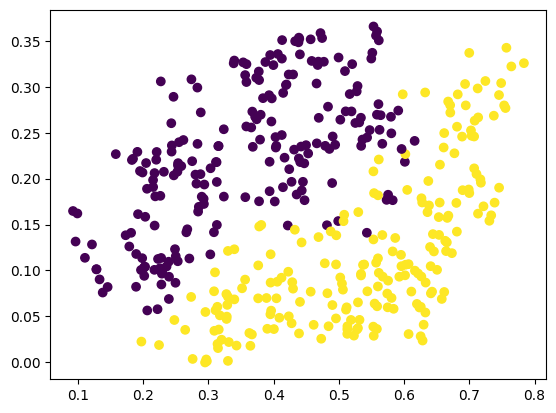

In [6]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0])
plt.show()

# Variables de clasificación

In [7]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Forward Pass

In [8]:
def model(x_train):
  return tf.matmul(x_train, W) + b

# Función de pérdida

In [9]:
def square_loss(y_train, predictions):
  per_sample_losses = tf.square(y_train - predictions)
  return tf.reduce_mean(per_sample_losses)

# Entrenamiento

In [10]:
learning_rate = 0.1

def training_step(x_train, y_train):
  with tf.GradientTape() as tape:
    predictions = model(x_train)
    loss = square_loss(predictions, y_train)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [11]:
for step in range(1000):
  loss = training_step(x_train, y_train)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.2429
Loss at step 1: 0.2422
Loss at step 2: 0.2415
Loss at step 3: 0.2408
Loss at step 4: 0.2401
Loss at step 5: 0.2395
Loss at step 6: 0.2388
Loss at step 7: 0.2382
Loss at step 8: 0.2375
Loss at step 9: 0.2369
Loss at step 10: 0.2362
Loss at step 11: 0.2356
Loss at step 12: 0.2350
Loss at step 13: 0.2343
Loss at step 14: 0.2337
Loss at step 15: 0.2331
Loss at step 16: 0.2325
Loss at step 17: 0.2318
Loss at step 18: 0.2312
Loss at step 19: 0.2306
Loss at step 20: 0.2300
Loss at step 21: 0.2294
Loss at step 22: 0.2288
Loss at step 23: 0.2282
Loss at step 24: 0.2276
Loss at step 25: 0.2270
Loss at step 26: 0.2264
Loss at step 27: 0.2258
Loss at step 28: 0.2252
Loss at step 29: 0.2246
Loss at step 30: 0.2240
Loss at step 31: 0.2234
Loss at step 32: 0.2229
Loss at step 33: 0.2223
Loss at step 34: 0.2217
Loss at step 35: 0.2211
Loss at step 36: 0.2206
Loss at step 37: 0.2200
Loss at step 38: 0.2194
Loss at step 39: 0.2189
Loss at step 40: 0.2183
Loss at step 41: 0.2177
Lo

# Predicciones

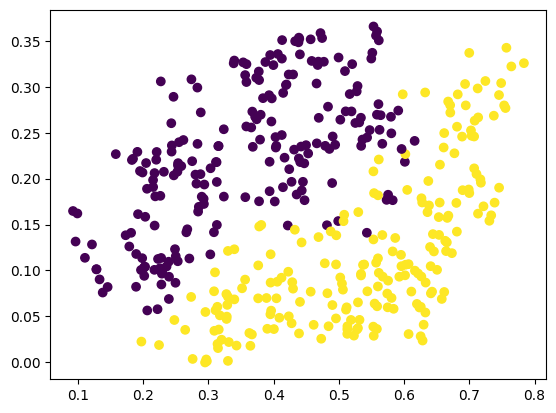

In [12]:
predictions = model(x_test)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0] > 0.5)
plt.show()

# Separar las clases

$y = [w_1    w_2][x_1    x_2] + b$

Tomando una clase binaria como la región superior (>0.5) y la otra como la región inferior (<0.5), se tiene:

**Clase 0**

$w_1x_1 + w_2x2 + b < 0.5$

**Clase 1**

$w_1x_1 + w_2x2 + b > 0.5$

Las dos clases están separadas por una línea recta dada por:

$x_2 = -w1x_1/w2_2 + (0.5 - b)/w_2$

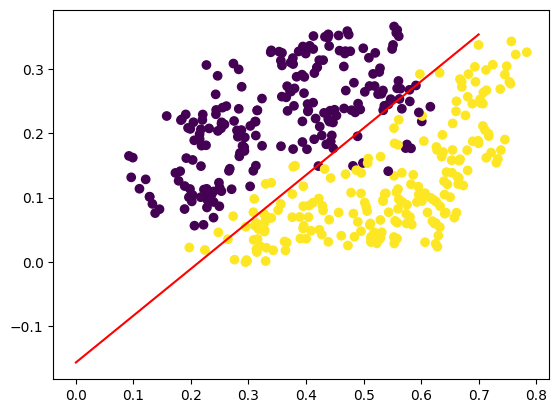

In [13]:
x1 = np.linspace(0.0, 0.7, 100)              # Puntos de evaluación para x1 (para la líena de frontera)
x2 = - W[0] / W[1] * x1 + (0.5 - b) / W[1]    # Cálculo de los puntos correspondientes de x2 (para la líena de frontera)
plt.plot(x1, x2, "-r")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0] > 0.5)

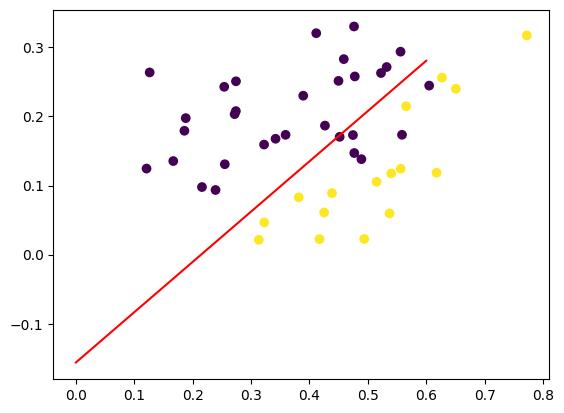

In [14]:
x = np.linspace(0.0, 0.6, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test[:, 0] > 0.5)